<a href="https://colab.research.google.com/github/Jaimish0513/24110091_sem3/blob/main/Updated_Code_from_professor_suggestion_Ai_and_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Running: tanh
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7623 - loss: 0.8732 - val_accuracy: 0.9480 - val_loss: 0.2779
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9194 - loss: 0.3807 - val_accuracy: 0.9623 - val_loss: 0.2354
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9335 - loss: 0.3245 - val_accuracy: 0.9598 - val_loss: 0.2348
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9433 - loss: 0.2903 - val_accuracy: 0.9667 - val_loss: 0.2090
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9515 - loss: 0.2635 - val_accuracy: 0.9723 - val_loss: 0.1910
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9546 - loss: 0.2493 - val_accuracy: 0.9722 - val_loss: 0.1949
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9584 - loss: 0.2332 - val_accuracy: 0.9728 - val_loss: 0.1936
Epoch 8/15
422/422 ━━━━━━━━━━

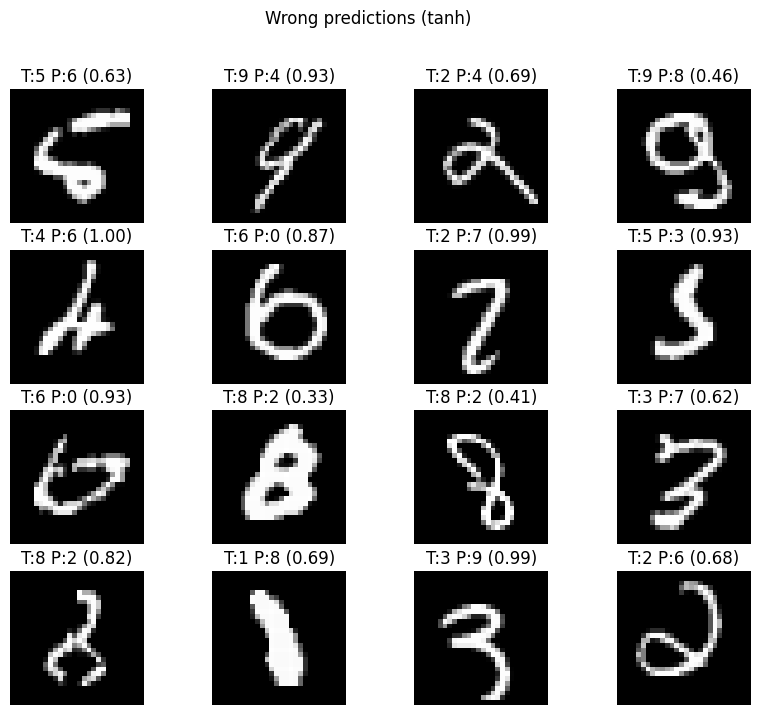


Running: sigmoid
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.4572 - loss: 1.7735 - val_accuracy: 0.8897 - val_loss: 0.5406
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.7942 - loss: 0.8179 - val_accuracy: 0.9197 - val_loss: 0.3634
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8531 - loss: 0.5917 - val_accuracy: 0.9335 - val_loss: 0.3008
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8781 - loss: 0.5011 - val_accuracy: 0.9502 - val_loss: 0.2471
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8985 - loss: 0.4344 - val_accuracy: 0.9618 - val_loss: 0.2082
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9152 - loss: 0.3783 - val_accuracy: 0.9650 - val_loss: 0.2007
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9223 - loss: 0.3528 - val_accuracy: 0.9677 - val_loss: 0.1884
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9300 - los

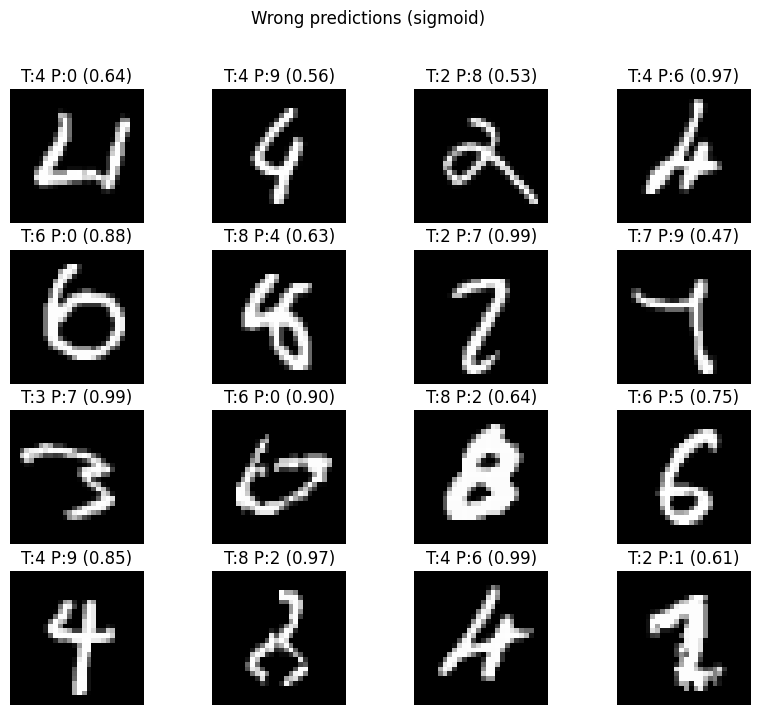


FINAL COMPARISON
{'activation': 'tanh', 'loss': 0.17369888722896576, 'accuracy': 0.9761999845504761, 'time': 126.22285461425781}
{'activation': 'sigmoid', 'loss': 0.17164216935634613, 'accuracy': 0.9739999771118164, 'time': 119.55335235595703}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


#experiment control(everything identical except activation function)
RANDOM_STATE = 7
NUM_EPOCHS = 15
BS = 128
LR = 1e-3

DENSE_STRUCTURE = (256,256,128,128,64,64)

np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)


#load the dataset

(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.mnist.load_data()

train_vec = train_imgs.reshape(-1,784).astype("float32")/255.0
test_vec = test_imgs.reshape(-1,784).astype("float32")/255.0

train_labels_cat = to_categorical(train_labels,10)
test_labels_cat = to_categorical(test_labels,10)

#model
def create_network(act_function):

    tf.keras.backend.clear_session()

    net = models.Sequential(name=f"model_{act_function}")
    net.add(layers.Input(shape=(784,)))

    for neurons in DENSE_STRUCTURE:

        net.add(layers.Dense(
            neurons,
            kernel_regularizer=tf.keras.regularizers.l2(1e-4)
        ))

        net.add(layers.BatchNormalization())
        net.add(layers.Activation(act_function))
        net.add(layers.Dropout(0.2))

    net.add(layers.Dense(10, activation="softmax"))

    net.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return net

#misclassification display with confidence

def display_wrong(xdata, ytrue, ypred, probs, title):

    wrong = np.where(ytrue != ypred)[0][:16]

    plt.figure(figsize=(10,8))
    for i, idx in enumerate(wrong):
        plt.subplot(4,4,i+1)
        plt.imshow(xdata[idx].reshape(28,28), cmap="gray")
        conf = probs[idx][ypred[idx]]
        plt.title(f"T:{ytrue[idx]} P:{ypred[idx]} ({conf:.2f})")
        plt.axis("off")

    plt.suptitle(title)
    plt.show()

#experiment

def run_experiment(act_function):

    print("\nRunning:", act_function)

    model = create_network(act_function)

    start = time.time()

    history = model.fit(
        train_vec,
        train_labels_cat,
        validation_split=0.1,
        epochs=NUM_EPOCHS,
        batch_size=BS,
        verbose=1
    )

    training_time = time.time() - start

    test_loss, test_acc = model.evaluate(test_vec, test_labels_cat, verbose=0)

    probs = model.predict(test_vec, verbose=0)
    preds = np.argmax(probs, axis=1)

    print("\nAccuracy:", test_acc)
    print("Training time:", training_time)

    print(classification_report(test_labels, preds, digits=4))

    cm = confusion_matrix(test_labels, preds)

    # analyse confused digits
    cm_no_diag = cm.copy()
    np.fill_diagonal(cm_no_diag,0)
    most_confused = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)

    print("Most confused digits:", most_confused)

    display_wrong(test_vec, test_labels, preds, probs,
                  f"Wrong predictions ({act_function})")

    return {
        "activation": act_function,
        "loss": test_loss,
        "accuracy": test_acc,
        "time": training_time
    }

#Run both experiments

results = []

results.append(run_experiment("tanh"))
results.append(run_experiment("sigmoid"))

print("\nFINAL COMPARISON")
for r in results:
    print(r)
